<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9916184	total: 61.5ms	remaining: 1m 1s
1:	learn: 0.9697258	total: 67.2ms	remaining: 33.5s
2:	learn: 0.9489666	total: 69.9ms	remaining: 23.2s
3:	learn: 0.9314268	total: 75.9ms	remaining: 18.9s
4:	learn: 0.9134266	total: 90.5ms	remaining: 18s
5:	learn: 0.8981129	total: 93.3ms	remaining: 15.5s
6:	learn: 0.8807241	total: 96.3ms	remaining: 13.7s
7:	learn: 0.8632342	total: 98.9ms	remaining: 12.3s
8:	learn: 0.8471661	total: 101ms	remaining: 11.1s
9:	learn: 0.8305121	total: 103ms	remaining: 10.2s
10:	learn: 0.8161921	total: 106ms	remaining: 9.56s
11:	learn: 0.7995572	total: 109ms	remaining: 8.94s
12:	learn: 0.7834121	total: 111ms	remaining: 8.45s
13:	learn: 0.7675753	total: 114ms	remaining: 8.03s
14:	learn: 0.7551206	total: 133ms	remaining: 8.7s
15:	learn: 0.7415820	total: 144ms	remaining: 8.85s
16:	learn: 0.7286368	total: 147ms	remaining: 8.48s
17:	learn: 0.7156594	total: 151ms	remaining: 8.24s
18:	learn: 0.7027371	total: 154ms	remaining: 7.93s
19:	lea

23:	learn: 0.6404664	total: 179ms	remaining: 7.29s
24:	learn: 0.6303242	total: 183ms	remaining: 7.12s
25:	learn: 0.6209351	total: 188ms	remaining: 7.04s
26:	learn: 0.6122670	total: 191ms	remaining: 6.88s
27:	learn: 0.6027326	total: 193ms	remaining: 6.71s
28:	learn: 0.5938105	total: 196ms	remaining: 6.56s
29:	learn: 0.5836196	total: 198ms	remaining: 6.42s
30:	learn: 0.5734944	total: 202ms	remaining: 6.3s
31:	learn: 0.5647529	total: 205ms	remaining: 6.19s
32:	learn: 0.5575443	total: 208ms	remaining: 6.08s
33:	learn: 0.5494609	total: 210ms	remaining: 5.98s
34:	learn: 0.5415744	total: 213ms	remaining: 5.86s
35:	learn: 0.5332248	total: 215ms	remaining: 5.77s
36:	learn: 0.5272628	total: 218ms	remaining: 5.68s
37:	learn: 0.5201465	total: 221ms	remaining: 5.59s
38:	learn: 0.5128716	total: 225ms	remaining: 5.54s
39:	learn: 0.5042916	total: 227ms	remaining: 5.46s
40:	learn: 0.4978155	total: 230ms	remaining: 5.38s
41:	learn: 0.4911366	total: 233ms	remaining: 5.31s
42:	learn: 0.4862090	total: 235m

55:	learn: 0.4172500	total: 303ms	remaining: 5.11s
56:	learn: 0.4134367	total: 307ms	remaining: 5.07s
57:	learn: 0.4091678	total: 309ms	remaining: 5.02s
58:	learn: 0.4052105	total: 330ms	remaining: 5.26s
59:	learn: 0.4011717	total: 333ms	remaining: 5.22s
60:	learn: 0.3969335	total: 339ms	remaining: 5.22s
61:	learn: 0.3926086	total: 343ms	remaining: 5.18s
62:	learn: 0.3896468	total: 345ms	remaining: 5.14s
63:	learn: 0.3863752	total: 353ms	remaining: 5.16s
64:	learn: 0.3837331	total: 356ms	remaining: 5.12s
65:	learn: 0.3812085	total: 361ms	remaining: 5.1s
66:	learn: 0.3773541	total: 370ms	remaining: 5.16s
67:	learn: 0.3741233	total: 373ms	remaining: 5.11s
68:	learn: 0.3714295	total: 376ms	remaining: 5.07s
69:	learn: 0.3684672	total: 381ms	remaining: 5.06s
70:	learn: 0.3649372	total: 388ms	remaining: 5.07s
71:	learn: 0.3618032	total: 391ms	remaining: 5.04s
72:	learn: 0.3592855	total: 395ms	remaining: 5.01s
73:	learn: 0.3561829	total: 397ms	remaining: 4.97s
74:	learn: 0.3539983	total: 399m

84:	learn: 0.3278079	total: 436ms	remaining: 4.69s
85:	learn: 0.3247855	total: 441ms	remaining: 4.68s
86:	learn: 0.3229351	total: 444ms	remaining: 4.66s
87:	learn: 0.3202491	total: 456ms	remaining: 4.73s
88:	learn: 0.3181664	total: 459ms	remaining: 4.7s
89:	learn: 0.3161750	total: 462ms	remaining: 4.67s
90:	learn: 0.3144155	total: 487ms	remaining: 4.86s
91:	learn: 0.3125658	total: 497ms	remaining: 4.91s
92:	learn: 0.3113214	total: 498ms	remaining: 4.86s
93:	learn: 0.3092024	total: 501ms	remaining: 4.83s
94:	learn: 0.3074413	total: 504ms	remaining: 4.8s
95:	learn: 0.3063915	total: 506ms	remaining: 4.76s
96:	learn: 0.3044589	total: 508ms	remaining: 4.73s
97:	learn: 0.3028190	total: 511ms	remaining: 4.7s
98:	learn: 0.3014665	total: 514ms	remaining: 4.68s
99:	learn: 0.3004955	total: 516ms	remaining: 4.64s
100:	learn: 0.2985575	total: 519ms	remaining: 4.62s
101:	learn: 0.2968606	total: 522ms	remaining: 4.59s
102:	learn: 0.2954289	total: 525ms	remaining: 4.57s
103:	learn: 0.2936789	total: 52

105:	learn: 0.2913038	total: 533ms	remaining: 4.5s
106:	learn: 0.2897978	total: 536ms	remaining: 4.47s
107:	learn: 0.2888371	total: 538ms	remaining: 4.45s
108:	learn: 0.2872860	total: 541ms	remaining: 4.42s
109:	learn: 0.2853591	total: 544ms	remaining: 4.4s
110:	learn: 0.2844810	total: 547ms	remaining: 4.38s
111:	learn: 0.2837586	total: 548ms	remaining: 4.35s
112:	learn: 0.2821005	total: 551ms	remaining: 4.33s
113:	learn: 0.2811388	total: 555ms	remaining: 4.31s
114:	learn: 0.2800137	total: 557ms	remaining: 4.29s
115:	learn: 0.2791633	total: 560ms	remaining: 4.27s
116:	learn: 0.2789375	total: 563ms	remaining: 4.25s
117:	learn: 0.2778520	total: 568ms	remaining: 4.24s
118:	learn: 0.2771355	total: 573ms	remaining: 4.24s
119:	learn: 0.2759727	total: 576ms	remaining: 4.22s
120:	learn: 0.2746225	total: 579ms	remaining: 4.2s
121:	learn: 0.2734873	total: 582ms	remaining: 4.19s
122:	learn: 0.2724614	total: 586ms	remaining: 4.18s
123:	learn: 0.2713209	total: 588ms	remaining: 4.16s
124:	learn: 0.2

147:	learn: 0.2513055	total: 704ms	remaining: 4.05s
148:	learn: 0.2508846	total: 713ms	remaining: 4.07s
149:	learn: 0.2499034	total: 728ms	remaining: 4.12s
150:	learn: 0.2493266	total: 738ms	remaining: 4.15s
151:	learn: 0.2479788	total: 749ms	remaining: 4.18s
152:	learn: 0.2474184	total: 764ms	remaining: 4.23s
153:	learn: 0.2469269	total: 791ms	remaining: 4.35s
154:	learn: 0.2465145	total: 852ms	remaining: 4.64s


155:	learn: 0.2457799	total: 922ms	remaining: 4.99s
156:	learn: 0.2449449	total: 928ms	remaining: 4.98s
157:	learn: 0.2444279	total: 936ms	remaining: 4.99s
158:	learn: 0.2438863	total: 953ms	remaining: 5.04s
159:	learn: 0.2432313	total: 959ms	remaining: 5.03s
160:	learn: 0.2424960	total: 972ms	remaining: 5.07s
161:	learn: 0.2419463	total: 976ms	remaining: 5.05s
162:	learn: 0.2414202	total: 981ms	remaining: 5.04s
163:	learn: 0.2405282	total: 1.02s	remaining: 5.18s
164:	learn: 0.2400550	total: 1.04s	remaining: 5.25s
165:	learn: 0.2394745	total: 1.05s	remaining: 5.28s
166:	learn: 0.2382790	total: 1.06s	remaining: 5.29s
167:	learn: 0.2380729	total: 1.08s	remaining: 5.36s


168:	learn: 0.2377470	total: 1.1s	remaining: 5.4s
169:	learn: 0.2371277	total: 1.12s	remaining: 5.45s
170:	learn: 0.2369213	total: 1.2s	remaining: 5.8s
171:	learn: 0.2364486	total: 1.23s	remaining: 5.9s
172:	learn: 0.2358921	total: 1.23s	remaining: 5.87s
173:	learn: 0.2352235	total: 1.23s	remaining: 5.84s
174:	learn: 0.2345384	total: 1.24s	remaining: 5.83s
175:	learn: 0.2340059	total: 1.25s	remaining: 5.83s
176:	learn: 0.2333652	total: 1.25s	remaining: 5.8s
177:	learn: 0.2329986	total: 1.26s	remaining: 5.8s
178:	learn: 0.2325236	total: 1.26s	remaining: 5.79s
179:	learn: 0.2321778	total: 1.27s	remaining: 5.77s
180:	learn: 0.2313751	total: 1.27s	remaining: 5.74s


181:	learn: 0.2303171	total: 1.27s	remaining: 5.72s
182:	learn: 0.2295864	total: 1.28s	remaining: 5.73s
183:	learn: 0.2289374	total: 1.29s	remaining: 5.73s
184:	learn: 0.2283286	total: 1.29s	remaining: 5.7s
185:	learn: 0.2276818	total: 1.3s	remaining: 5.68s
186:	learn: 0.2265070	total: 1.3s	remaining: 5.66s
187:	learn: 0.2263768	total: 1.3s	remaining: 5.63s
188:	learn: 0.2254401	total: 1.31s	remaining: 5.64s
189:	learn: 0.2242090	total: 1.32s	remaining: 5.64s
190:	learn: 0.2234936	total: 1.38s	remaining: 5.84s


191:	learn: 0.2226399	total: 1.47s	remaining: 6.21s
192:	learn: 0.2220396	total: 1.48s	remaining: 6.18s
193:	learn: 0.2213735	total: 1.48s	remaining: 6.16s
194:	learn: 0.2205396	total: 1.5s	remaining: 6.2s
195:	learn: 0.2198295	total: 1.51s	remaining: 6.19s
196:	learn: 0.2193054	total: 1.52s	remaining: 6.18s
197:	learn: 0.2190136	total: 1.52s	remaining: 6.17s
198:	learn: 0.2185292	total: 1.53s	remaining: 6.18s
199:	learn: 0.2182533	total: 1.57s	remaining: 6.29s
200:	learn: 0.2176599	total: 1.57s	remaining: 6.26s
201:	learn: 0.2174659	total: 1.58s	remaining: 6.25s
202:	learn: 0.2171986	total: 1.59s	remaining: 6.24s
203:	learn: 0.2165840	total: 1.59s	remaining: 6.21s
204:	learn: 0.2161302	total: 1.6s	remaining: 6.22s
205:	learn: 0.2154146	total: 1.63s	remaining: 6.26s


206:	learn: 0.2147016	total: 1.63s	remaining: 6.25s
207:	learn: 0.2142311	total: 1.64s	remaining: 6.25s
208:	learn: 0.2135256	total: 1.65s	remaining: 6.24s
209:	learn: 0.2131171	total: 1.65s	remaining: 6.22s
210:	learn: 0.2125643	total: 1.66s	remaining: 6.2s
211:	learn: 0.2118963	total: 1.66s	remaining: 6.18s
212:	learn: 0.2114141	total: 1.67s	remaining: 6.17s
213:	learn: 0.2106438	total: 1.67s	remaining: 6.15s
214:	learn: 0.2100578	total: 1.68s	remaining: 6.14s
215:	learn: 0.2096825	total: 1.69s	remaining: 6.12s
216:	learn: 0.2091029	total: 1.69s	remaining: 6.09s
217:	learn: 0.2086718	total: 1.69s	remaining: 6.07s
218:	learn: 0.2079660	total: 1.7s	remaining: 6.05s
219:	learn: 0.2075219	total: 1.7s	remaining: 6.03s
220:	learn: 0.2070633	total: 1.7s	remaining: 6.01s
221:	learn: 0.2066783	total: 1.71s	remaining: 5.99s
222:	learn: 0.2064423	total: 1.71s	remaining: 5.97s
223:	learn: 0.2058432	total: 1.72s	remaining: 5.95s
224:	learn: 0.2051534	total: 1.72s	remaining: 5.93s
225:	learn: 0.20

227:	learn: 0.2037188	total: 1.81s	remaining: 6.13s
228:	learn: 0.2034164	total: 1.83s	remaining: 6.18s
229:	learn: 0.2031321	total: 1.84s	remaining: 6.16s
230:	learn: 0.2027932	total: 1.85s	remaining: 6.17s
231:	learn: 0.2022057	total: 1.9s	remaining: 6.28s
232:	learn: 0.2014471	total: 1.9s	remaining: 6.26s
233:	learn: 0.2012282	total: 1.9s	remaining: 6.23s
234:	learn: 0.2007817	total: 1.91s	remaining: 6.21s
235:	learn: 0.2001286	total: 1.91s	remaining: 6.18s
236:	learn: 0.1997950	total: 1.91s	remaining: 6.16s
237:	learn: 0.1995374	total: 1.92s	remaining: 6.13s
238:	learn: 0.1993543	total: 1.92s	remaining: 6.11s
239:	learn: 0.1991063	total: 1.92s	remaining: 6.09s
240:	learn: 0.1983736	total: 1.93s	remaining: 6.07s
241:	learn: 0.1977817	total: 1.93s	remaining: 6.04s
242:	learn: 0.1976049	total: 1.93s	remaining: 6.02s
243:	learn: 0.1970339	total: 1.94s	remaining: 6s
244:	learn: 0.1967213	total: 1.94s	remaining: 5.98s
245:	learn: 0.1965487	total: 1.94s	remaining: 5.96s
246:	learn: 0.1961

254:	learn: 0.1922495	total: 1.97s	remaining: 5.76s
255:	learn: 0.1920864	total: 1.98s	remaining: 5.74s
256:	learn: 0.1917033	total: 1.98s	remaining: 5.72s
257:	learn: 0.1914936	total: 1.98s	remaining: 5.7s
258:	learn: 0.1910389	total: 1.98s	remaining: 5.67s
259:	learn: 0.1906718	total: 1.99s	remaining: 5.65s
260:	learn: 0.1901951	total: 1.99s	remaining: 5.63s
261:	learn: 0.1897761	total: 1.99s	remaining: 5.61s
262:	learn: 0.1894609	total: 1.99s	remaining: 5.58s
263:	learn: 0.1890599	total: 2s	remaining: 5.56s
264:	learn: 0.1886149	total: 2s	remaining: 5.54s
265:	learn: 0.1882195	total: 2s	remaining: 5.52s
266:	learn: 0.1875981	total: 2s	remaining: 5.5s
267:	learn: 0.1873183	total: 2.01s	remaining: 5.48s
268:	learn: 0.1870812	total: 2.01s	remaining: 5.46s
269:	learn: 0.1866665	total: 2.01s	remaining: 5.44s
270:	learn: 0.1861277	total: 2.02s	remaining: 5.42s
271:	learn: 0.1854717	total: 2.02s	remaining: 5.4s
272:	learn: 0.1847671	total: 2.02s	remaining: 5.39s
273:	learn: 0.1844785	total

293:	learn: 0.1753828	total: 2.1s	remaining: 5.05s
294:	learn: 0.1751371	total: 2.11s	remaining: 5.03s
295:	learn: 0.1747459	total: 2.15s	remaining: 5.11s
296:	learn: 0.1742152	total: 2.16s	remaining: 5.11s
297:	learn: 0.1737329	total: 2.16s	remaining: 5.1s
298:	learn: 0.1736323	total: 2.17s	remaining: 5.08s
299:	learn: 0.1731571	total: 2.17s	remaining: 5.06s
300:	learn: 0.1730803	total: 2.17s	remaining: 5.05s
301:	learn: 0.1728596	total: 2.18s	remaining: 5.03s
302:	learn: 0.1723489	total: 2.18s	remaining: 5.01s
303:	learn: 0.1718416	total: 2.19s	remaining: 5s
304:	learn: 0.1717290	total: 2.19s	remaining: 4.98s
305:	learn: 0.1711959	total: 2.19s	remaining: 4.96s
306:	learn: 0.1711177	total: 2.19s	remaining: 4.95s
307:	learn: 0.1707649	total: 2.2s	remaining: 4.94s
308:	learn: 0.1702653	total: 2.2s	remaining: 4.92s
309:	learn: 0.1698770	total: 2.2s	remaining: 4.9s
310:	learn: 0.1694916	total: 2.2s	remaining: 4.88s
311:	learn: 0.1692274	total: 2.21s	remaining: 4.87s
312:	learn: 0.1691287	

341:	learn: 0.1582913	total: 2.27s	remaining: 4.37s
342:	learn: 0.1579761	total: 2.27s	remaining: 4.36s
343:	learn: 0.1575467	total: 2.28s	remaining: 4.34s
344:	learn: 0.1573929	total: 2.28s	remaining: 4.33s
345:	learn: 0.1570906	total: 2.28s	remaining: 4.32s
346:	learn: 0.1567784	total: 2.29s	remaining: 4.3s
347:	learn: 0.1565671	total: 2.29s	remaining: 4.29s
348:	learn: 0.1560550	total: 2.3s	remaining: 4.29s
349:	learn: 0.1557423	total: 2.35s	remaining: 4.36s
350:	learn: 0.1553601	total: 2.36s	remaining: 4.36s
351:	learn: 0.1551849	total: 2.36s	remaining: 4.34s
352:	learn: 0.1549454	total: 2.36s	remaining: 4.33s
353:	learn: 0.1546076	total: 2.37s	remaining: 4.32s
354:	learn: 0.1543380	total: 2.37s	remaining: 4.3s
355:	learn: 0.1539769	total: 2.37s	remaining: 4.29s
356:	learn: 0.1539008	total: 2.38s	remaining: 4.28s
357:	learn: 0.1534804	total: 2.38s	remaining: 4.27s
358:	learn: 0.1532666	total: 2.39s	remaining: 4.26s
359:	learn: 0.1528077	total: 2.39s	remaining: 4.26s
360:	learn: 0.1

371:	learn: 0.1489598	total: 2.44s	remaining: 4.12s
372:	learn: 0.1488880	total: 2.44s	remaining: 4.11s
373:	learn: 0.1485874	total: 2.44s	remaining: 4.09s
374:	learn: 0.1481343	total: 2.45s	remaining: 4.08s
375:	learn: 0.1480625	total: 2.45s	remaining: 4.06s
376:	learn: 0.1477355	total: 2.45s	remaining: 4.05s
377:	learn: 0.1475277	total: 2.45s	remaining: 4.04s
378:	learn: 0.1474167	total: 2.46s	remaining: 4.02s
379:	learn: 0.1470939	total: 2.46s	remaining: 4.01s
380:	learn: 0.1470051	total: 2.46s	remaining: 4s
381:	learn: 0.1466088	total: 2.46s	remaining: 3.98s
382:	learn: 0.1462985	total: 2.46s	remaining: 3.97s
383:	learn: 0.1461715	total: 2.46s	remaining: 3.96s
384:	learn: 0.1457159	total: 2.47s	remaining: 3.94s
385:	learn: 0.1453755	total: 2.47s	remaining: 3.93s
386:	learn: 0.1452780	total: 2.47s	remaining: 3.92s
387:	learn: 0.1450238	total: 2.48s	remaining: 3.9s
388:	learn: 0.1449395	total: 2.48s	remaining: 3.89s
389:	learn: 0.1446722	total: 2.48s	remaining: 3.88s
390:	learn: 0.14

444:	learn: 0.1314206	total: 2.62s	remaining: 3.26s
445:	learn: 0.1313883	total: 2.62s	remaining: 3.25s
446:	learn: 0.1309982	total: 2.62s	remaining: 3.24s
447:	learn: 0.1306720	total: 2.62s	remaining: 3.23s
448:	learn: 0.1305155	total: 2.63s	remaining: 3.22s
449:	learn: 0.1302215	total: 2.63s	remaining: 3.21s
450:	learn: 0.1300372	total: 2.63s	remaining: 3.21s
451:	learn: 0.1298830	total: 2.63s	remaining: 3.19s
452:	learn: 0.1298402	total: 2.64s	remaining: 3.19s
453:	learn: 0.1297522	total: 2.64s	remaining: 3.17s
454:	learn: 0.1294622	total: 2.64s	remaining: 3.17s
455:	learn: 0.1291446	total: 2.65s	remaining: 3.16s
456:	learn: 0.1287538	total: 2.65s	remaining: 3.15s
457:	learn: 0.1284615	total: 2.65s	remaining: 3.14s
458:	learn: 0.1281732	total: 2.65s	remaining: 3.13s
459:	learn: 0.1278346	total: 2.65s	remaining: 3.12s
460:	learn: 0.1276816	total: 2.66s	remaining: 3.11s
461:	learn: 0.1273473	total: 2.66s	remaining: 3.1s
462:	learn: 0.1271152	total: 2.66s	remaining: 3.09s
463:	learn: 0

524:	learn: 0.1133135	total: 2.8s	remaining: 2.53s
525:	learn: 0.1130913	total: 2.8s	remaining: 2.52s
526:	learn: 0.1128654	total: 2.8s	remaining: 2.52s
527:	learn: 0.1126990	total: 2.81s	remaining: 2.51s
528:	learn: 0.1126793	total: 2.81s	remaining: 2.5s
529:	learn: 0.1126545	total: 2.81s	remaining: 2.49s
530:	learn: 0.1124413	total: 2.81s	remaining: 2.48s
531:	learn: 0.1121793	total: 2.81s	remaining: 2.48s
532:	learn: 0.1119703	total: 2.82s	remaining: 2.47s
533:	learn: 0.1118605	total: 2.82s	remaining: 2.46s
534:	learn: 0.1116498	total: 2.82s	remaining: 2.45s
535:	learn: 0.1115438	total: 2.83s	remaining: 2.45s
536:	learn: 0.1113197	total: 2.83s	remaining: 2.44s
537:	learn: 0.1110697	total: 2.83s	remaining: 2.43s
538:	learn: 0.1109495	total: 2.83s	remaining: 2.42s
539:	learn: 0.1106147	total: 2.83s	remaining: 2.41s
540:	learn: 0.1103084	total: 2.84s	remaining: 2.41s
541:	learn: 0.1100568	total: 2.84s	remaining: 2.4s
542:	learn: 0.1097610	total: 2.84s	remaining: 2.39s
543:	learn: 0.109

602:	learn: 0.0995909	total: 2.97s	remaining: 1.96s
603:	learn: 0.0993920	total: 2.98s	remaining: 1.95s
604:	learn: 0.0992033	total: 2.98s	remaining: 1.95s
605:	learn: 0.0990638	total: 2.98s	remaining: 1.94s
606:	learn: 0.0988984	total: 2.98s	remaining: 1.93s
607:	learn: 0.0987776	total: 2.99s	remaining: 1.93s
608:	learn: 0.0985422	total: 2.99s	remaining: 1.92s
609:	learn: 0.0984556	total: 2.99s	remaining: 1.91s
610:	learn: 0.0983869	total: 2.99s	remaining: 1.91s
611:	learn: 0.0981525	total: 2.99s	remaining: 1.9s
612:	learn: 0.0979016	total: 3s	remaining: 1.89s
613:	learn: 0.0977593	total: 3s	remaining: 1.88s
614:	learn: 0.0975021	total: 3s	remaining: 1.88s
615:	learn: 0.0974275	total: 3s	remaining: 1.87s
616:	learn: 0.0972619	total: 3s	remaining: 1.86s
617:	learn: 0.0971422	total: 3.01s	remaining: 1.86s
618:	learn: 0.0970910	total: 3.01s	remaining: 1.85s
619:	learn: 0.0969128	total: 3.01s	remaining: 1.84s
620:	learn: 0.0967886	total: 3.01s	remaining: 1.84s
621:	learn: 0.0966694	total:

674:	learn: 0.0888172	total: 3.15s	remaining: 1.52s
675:	learn: 0.0886676	total: 3.16s	remaining: 1.51s
676:	learn: 0.0886102	total: 3.16s	remaining: 1.51s
677:	learn: 0.0885011	total: 3.16s	remaining: 1.5s
678:	learn: 0.0883722	total: 3.16s	remaining: 1.5s
679:	learn: 0.0883110	total: 3.17s	remaining: 1.49s
680:	learn: 0.0881871	total: 3.17s	remaining: 1.48s
681:	learn: 0.0880318	total: 3.17s	remaining: 1.48s
682:	learn: 0.0878334	total: 3.17s	remaining: 1.47s
683:	learn: 0.0876053	total: 3.18s	remaining: 1.47s
684:	learn: 0.0874957	total: 3.18s	remaining: 1.46s
685:	learn: 0.0874640	total: 3.18s	remaining: 1.46s
686:	learn: 0.0873410	total: 3.18s	remaining: 1.45s
687:	learn: 0.0873224	total: 3.19s	remaining: 1.44s
688:	learn: 0.0872112	total: 3.19s	remaining: 1.44s
689:	learn: 0.0871250	total: 3.19s	remaining: 1.43s
690:	learn: 0.0869960	total: 3.19s	remaining: 1.43s
691:	learn: 0.0868118	total: 3.19s	remaining: 1.42s
692:	learn: 0.0866942	total: 3.19s	remaining: 1.42s
693:	learn: 0.

746:	learn: 0.0796190	total: 3.33s	remaining: 1.13s
747:	learn: 0.0795032	total: 3.34s	remaining: 1.12s
748:	learn: 0.0793405	total: 3.34s	remaining: 1.12s
749:	learn: 0.0791497	total: 3.34s	remaining: 1.11s
750:	learn: 0.0789696	total: 3.34s	remaining: 1.11s
751:	learn: 0.0788273	total: 3.35s	remaining: 1.1s
752:	learn: 0.0787253	total: 3.35s	remaining: 1.1s
753:	learn: 0.0785251	total: 3.35s	remaining: 1.09s
754:	learn: 0.0784606	total: 3.35s	remaining: 1.09s
755:	learn: 0.0783319	total: 3.35s	remaining: 1.08s
756:	learn: 0.0783090	total: 3.35s	remaining: 1.08s
757:	learn: 0.0781982	total: 3.36s	remaining: 1.07s
758:	learn: 0.0781635	total: 3.36s	remaining: 1.07s
759:	learn: 0.0781304	total: 3.36s	remaining: 1.06s
760:	learn: 0.0779935	total: 3.36s	remaining: 1.06s
761:	learn: 0.0778327	total: 3.37s	remaining: 1.05s
762:	learn: 0.0777088	total: 3.37s	remaining: 1.05s
763:	learn: 0.0775218	total: 3.37s	remaining: 1.04s
764:	learn: 0.0774914	total: 3.37s	remaining: 1.03s
765:	learn: 0.

815:	learn: 0.0715316	total: 3.49s	remaining: 787ms
816:	learn: 0.0713670	total: 3.5s	remaining: 783ms
817:	learn: 0.0712285	total: 3.5s	remaining: 778ms
818:	learn: 0.0711755	total: 3.5s	remaining: 773ms
819:	learn: 0.0710711	total: 3.5s	remaining: 769ms
820:	learn: 0.0708858	total: 3.5s	remaining: 764ms
821:	learn: 0.0708105	total: 3.51s	remaining: 759ms
822:	learn: 0.0706448	total: 3.51s	remaining: 755ms
823:	learn: 0.0705398	total: 3.51s	remaining: 750ms
824:	learn: 0.0704333	total: 3.51s	remaining: 745ms
825:	learn: 0.0703813	total: 3.52s	remaining: 741ms
826:	learn: 0.0703146	total: 3.52s	remaining: 736ms
827:	learn: 0.0701857	total: 3.52s	remaining: 732ms
828:	learn: 0.0700336	total: 3.52s	remaining: 727ms
829:	learn: 0.0699873	total: 3.53s	remaining: 722ms
830:	learn: 0.0698709	total: 3.53s	remaining: 718ms
831:	learn: 0.0698333	total: 3.53s	remaining: 713ms
832:	learn: 0.0697195	total: 3.53s	remaining: 708ms
833:	learn: 0.0696059	total: 3.54s	remaining: 704ms
834:	learn: 0.069

898:	learn: 0.0643541	total: 3.67s	remaining: 413ms
899:	learn: 0.0642607	total: 3.68s	remaining: 409ms
900:	learn: 0.0641015	total: 3.68s	remaining: 404ms
901:	learn: 0.0640073	total: 3.68s	remaining: 400ms
902:	learn: 0.0639982	total: 3.69s	remaining: 396ms
903:	learn: 0.0638824	total: 3.69s	remaining: 392ms
904:	learn: 0.0638700	total: 3.69s	remaining: 387ms
905:	learn: 0.0637621	total: 3.69s	remaining: 383ms
906:	learn: 0.0637197	total: 3.69s	remaining: 379ms
907:	learn: 0.0637137	total: 3.7s	remaining: 375ms
908:	learn: 0.0636754	total: 3.7s	remaining: 370ms
909:	learn: 0.0635290	total: 3.7s	remaining: 366ms
910:	learn: 0.0634405	total: 3.71s	remaining: 362ms
911:	learn: 0.0633100	total: 3.71s	remaining: 358ms
912:	learn: 0.0632111	total: 3.71s	remaining: 354ms
913:	learn: 0.0630511	total: 3.71s	remaining: 349ms
914:	learn: 0.0629778	total: 3.71s	remaining: 345ms
915:	learn: 0.0629083	total: 3.72s	remaining: 341ms
916:	learn: 0.0628475	total: 3.72s	remaining: 337ms
917:	learn: 0.0

974:	learn: 0.0585146	total: 3.85s	remaining: 98.8ms
975:	learn: 0.0584192	total: 3.85s	remaining: 94.8ms
976:	learn: 0.0583409	total: 3.86s	remaining: 90.8ms
977:	learn: 0.0582184	total: 3.86s	remaining: 86.8ms
978:	learn: 0.0581872	total: 3.86s	remaining: 82.9ms
979:	learn: 0.0581075	total: 3.86s	remaining: 78.9ms
980:	learn: 0.0580659	total: 3.87s	remaining: 74.9ms
981:	learn: 0.0579014	total: 3.87s	remaining: 70.9ms
982:	learn: 0.0577571	total: 3.87s	remaining: 66.9ms
983:	learn: 0.0576608	total: 3.87s	remaining: 63ms
984:	learn: 0.0575712	total: 3.87s	remaining: 59ms
985:	learn: 0.0574740	total: 3.88s	remaining: 55ms
986:	learn: 0.0574108	total: 3.88s	remaining: 51.1ms
987:	learn: 0.0573555	total: 3.88s	remaining: 47.1ms
988:	learn: 0.0573494	total: 3.88s	remaining: 43.2ms
989:	learn: 0.0573272	total: 3.89s	remaining: 39.3ms
990:	learn: 0.0572519	total: 3.89s	remaining: 35.3ms
991:	learn: 0.0571845	total: 3.89s	remaining: 31.4ms
992:	learn: 0.0571747	total: 3.9s	remaining: 27.5ms


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.22520335938315547
ABC Pre-generator MAE 1.0553335712757248


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

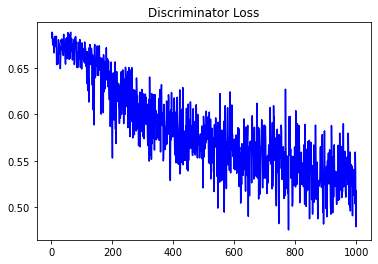

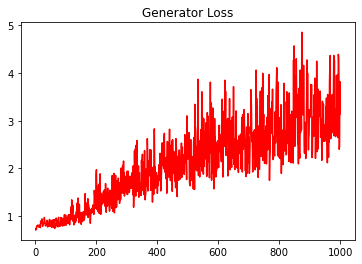

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.23153396317187477


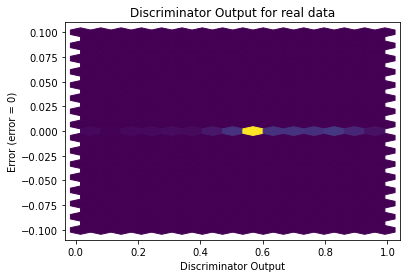

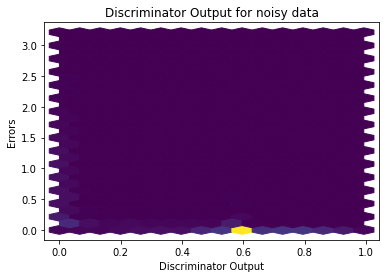

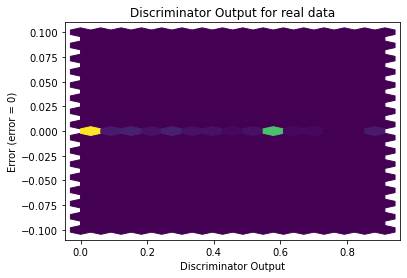

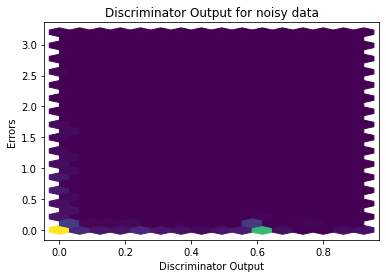

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())